In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ipl_data = pd.read_csv('IPL 2017 - Adv Report v1.csv')
ipl_data.head()

,Channel,Date,Start Time {Av(Tm)},End Time {Av(Tm)},Month,Length [sec] {Av},Description,Ev. Type,Brand,Sector,Category,Advertiser,Impressions´000 {Av(Wg)},Rate/10 Sec,Cost
0,Sony MAX,05/04/2017,06:34:47 PM,06:35:02 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,"2,463.19","200,000","300,000"
1,Sony MAX,05/04/2017,06:35:02 PM,06:35:12 PM,4,10,YAMAHA FZ 25,Commercial,YAMAHA FZ 25,Auto,AUTO-TWO WHEELERS,YAMAHA MOTOR INDIA PVT LTD,"2,006.82","200,000","200,000"
2,Sony MAX,05/04/2017,06:35:12 PM,06:35:42 PM,4,30,JIO DIGITAL LIFE,Commercial,JIO DIGITAL LIFE,Telecom/Internet Service Providers,CELLULAR PHONE SERVICE,RELIANCE JIO INFOCOMM LTD,"2,006.82","200,000","600,000"
3,Sony MAX,05/04/2017,06:35:42 PM,06:36:12 PM,4,30,AMUL ICE CREAM,Commercial,AMUL ICE CREAM,Food & Beverages,ICE CREAM/FROZEN DESSERTS,GCMMF (GUJ COOP MILK MKT FED),"1,966.16","200,000","600,000"
4,Sony MAX,05/04/2017,06:36:12 PM,06:36:27 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,"1,905.15","200,000","300,000"


In [10]:
ipl_data.index = pd.to_datetime(ipl_data['Date'])
ipl_data['Cost'] = ipl_data['Cost'].str.replace(',',"")
ipl_data["Impressions´000 {Av(Wg)}"] = ipl_data["Impressions´000 {Av(Wg)}"].str.replace(',',"")
ipl_data['Rate/10 Sec'] = ipl_data['Rate/10 Sec'].str.replace(',',"")
ipl_data["Impressions´000 {Av(Wg)}"] = ipl_data["Impressions´000 {Av(Wg)}"].astype('float64')
ipl_data['Rate/10 Sec'] = ipl_data['Rate/10 Sec'].astype(int)
ipl_data['Cost'] = ipl_data['Cost'].astype(int)
names=ipl_data.columns.tolist()
names[names.index('Impressions´000 {Av(Wg)}')]='Impressions'
ipl_data.columns=names
ipl_data.head()

,Channel,Date,Start Time {Av(Tm)},End Time {Av(Tm)},Month,Length [sec] {Av},Description,Ev. Type,Brand,Sector,Category,Advertiser,Impressions,Rate/10 Sec,Cost
Date,,,,,,,,,,,,,,,
2017-05-04,Sony MAX,05/04/2017,06:34:47 PM,06:35:02 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,2463.19,200000,300000
2017-05-04,Sony MAX,05/04/2017,06:35:02 PM,06:35:12 PM,4,10,YAMAHA FZ 25,Commercial,YAMAHA FZ 25,Auto,AUTO-TWO WHEELERS,YAMAHA MOTOR INDIA PVT LTD,2006.82,200000,200000
2017-05-04,Sony MAX,05/04/2017,06:35:12 PM,06:35:42 PM,4,30,JIO DIGITAL LIFE,Commercial,JIO DIGITAL LIFE,Telecom/Internet Service Providers,CELLULAR PHONE SERVICE,RELIANCE JIO INFOCOMM LTD,2006.82,200000,600000
2017-05-04,Sony MAX,05/04/2017,06:35:42 PM,06:36:12 PM,4,30,AMUL ICE CREAM,Commercial,AMUL ICE CREAM,Food & Beverages,ICE CREAM/FROZEN DESSERTS,GCMMF (GUJ COOP MILK MKT FED),1966.16,200000,600000
2017-05-04,Sony MAX,05/04/2017,06:36:12 PM,06:36:27 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,1905.15,200000,300000


In [14]:
ipl_grp_sector = ipl_data.groupby("Sector") #Grouped by Sector
ipl_grp_sector["Channel"].count().sort_values(ascending = False)

Sector
Durables                                            12046
Telecom Products                                     8967
Food & Beverages                                     6798
Auto                                                 6331
Personal Care/Personal Hygiene                       4503
Textiles/Clothing                                    4438
Telecom/Internet Service Providers                   4249
Services                                             3498
Building, Industrial & Land Materials/Equipments     1972
Alcoholic Drinks                                     1247
Corporate/Brand Image                                1237
Retail                                                700
Banking/Finance/Investment                            637
Fuel/Petroleum Products                               554
Personal Healthcare                                   507
Miscellaneous                                         405
Personal Accessories                                  370
Laundry

In [15]:
ipl_grp_month = ipl_data.groupby("Month")
ipl_grp_month["Channel"].count().sort_values(ascending = False)

Month
4    33208
5    25716
Name: Channel, dtype: int64

In [16]:
#Selecting Telecom Sector...
ipl_tel = ipl_data[(ipl_data['Sector'] == 'Telecom Products')]
ipl_tel

,Channel,Date,Start Time {Av(Tm)},End Time {Av(Tm)},Month,Length [sec] {Av},Description,Ev. Type,Brand,Sector,Category,Advertiser,Impressions,Rate/10 Sec,Cost
Date,,,,,,,,,,,,,,,
2017-05-04,Sony MAX,05/04/2017,06:34:47 PM,06:35:02 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,2463.19,200000,300000
2017-05-04,Sony MAX,05/04/2017,06:36:12 PM,06:36:27 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,1905.15,200000,300000
2017-05-04,Sony MAX,05/04/2017,06:37:07 PM,06:37:22 PM,4,15,MOTOROLA MOTO G FAMILY,Commercial,MOTOROLA MOTO G FAMILY,Telecom Products,CELLULAR PHONES-SMART PHONES,MOTOROLA,2062.19,200000,300000
2017-05-04,Sony MAX,05/04/2017,06:37:52 PM,06:38:22 PM,4,30,SAMSUNG PAY,Commercial,SAMSUNG PAY,Telecom Products,CELLULAR PHONES-SMART PHONES,SAMSUNG INDIA ELECTRONICS LTD,2117.51,200000,600000
2017-05-04,Sony MAX,05/04/2017,06:54:00 PM,06:54:30 PM,4,30,MOTOROLA MOTO G FAMILY,Commercial,MOTOROLA MOTO G FAMILY,Telecom Products,CELLULAR PHONES-SMART PHONES,MOTOROLA,3727.97,200000,600000
2017-05-04,Sony MAX,05/04/2017,06:55:20 PM,06:55:35 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,3550.70,200000,300000
2017-05-04,Sony MAX,05/04/2017,06:56:25 PM,06:56:40 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,3363.92,200000,300000
2017-05-04,Sony MAX,05/04/2017,07:01:57 PM,07:02:12 PM,4,15,OPPO F3 PLUS,Commercial,OPPO F3 PLUS,Telecom Products,CELLULAR PHONES-SMART PHONES,OPPO INDIA,4435.90,200000,300000
2017-05-04,Sony MAX,05/04/2017,07:02:52 PM,07:03:22 PM,4,30,SAMSUNG PAY,Commercial,SAMSUNG PAY,Telecom Products,CELLULAR PHONES-SMART PHONES,SAMSUNG INDIA ELECTRONICS LTD,3950.66,200000,600000


In [99]:
# Relating Cost and Impressions
ipl_tel_grp = ipl_tel.groupby('Advertiser')
ipl_tel_grp_n = ipl_tel_grp["Impressions"].sum().sort_values()
ipl_tel_grp_n

Advertiser
APPLE COMPUTER INDIA               133089.14
MOTOROLA                           183683.00
RELIANCE JIO INFOCOMM LTD          634848.36
MICROMAX INFORMATICS LTD          1531091.63
SAMSUNG INDIA ELECTRONICS LTD     2453510.24
SYNTECH TECHNOLOGY PVT LTD        3325378.53
OPPO INDIA                       14845125.85
VIVO MOBILE INDIA PVT LTD        17713701.48
Name: Impressions, dtype: float64

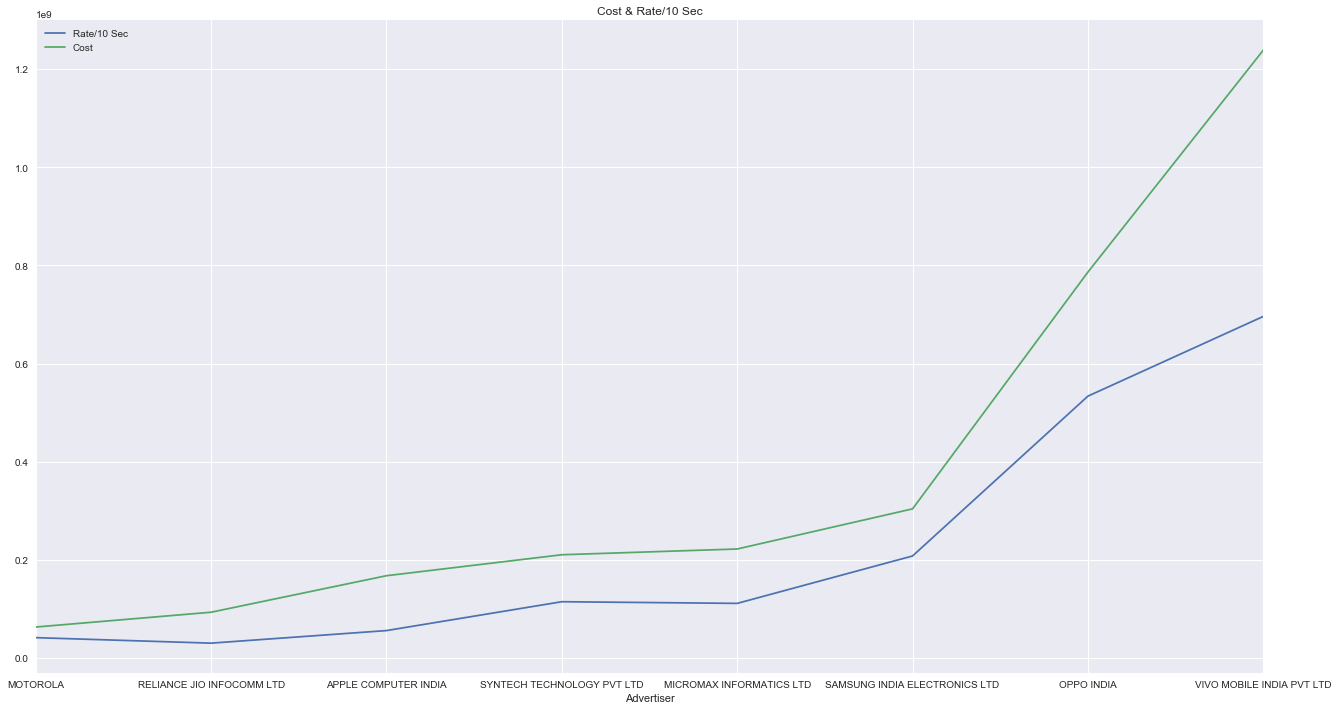

In [21]:
# company spends
ipl_tel_grp_p = ipl_tel_grp_n[["Rate/10 Sec", "Cost"]].plot(title = 'Cost & Rate/10 Sec')
ipl_tel_grp_p = ipl_tel_grp_p.get_figure()
ipl_tel_grp_p.set_size_inches(22, 12)

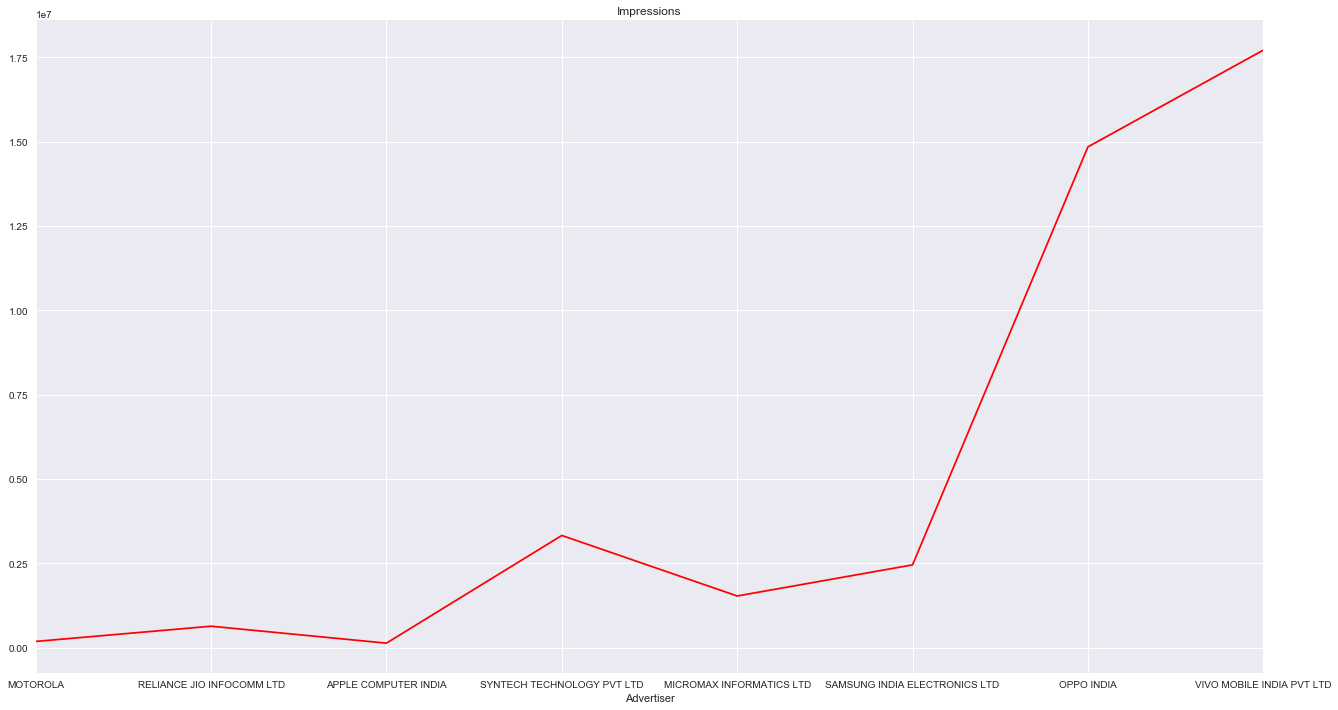

In [22]:
# impressions / company
ipl_tel_grp_p = ipl_tel_grp_n["Impressions"].plot(title = "Impressions", color = "Red")
ipl_tel_grp_p = ipl_tel_grp_p.get_figure()
ipl_tel_grp_p.set_size_inches(22, 12)

In [103]:
ipl_tel_grp_len = ipl_tel_grp[["Length [sec] {Av}"]].mean().sort_values(by = "Length [sec] {Av}")
ipl_tel_grp_len['Length Median'] = ipl_tel_grp[["Length [sec] {Av}"]].median()
ipl_tel_grp_len['Length Max'] = ipl_tel_grp[["Length [sec] {Av}"]].max()
ipl_tel_grp_len['Length Min'] = ipl_tel_grp[["Length [sec] {Av}"]].min()
ipl_tel_grp_len

,Length [sec] {Av},Length Median,Length Max,Length Min
Advertiser,,,,
SAMSUNG INDIA ELECTRONICS LTD,14.609030,10,30,5
OPPO INDIA,14.735107,15,15,2
MOTOROLA,15.177033,15,30,3
VIVO MOBILE INDIA PVT LTD,17.792014,15,45,3
SYNTECH TECHNOLOGY PVT LTD,18.320000,15,35,2
MICROMAX INFORMATICS LTD,19.928315,20,20,5
APPLE COMPUTER INDIA,29.886121,30,30,3
RELIANCE JIO INFOCOMM LTD,30.588235,30,45,30


In [24]:
ipl_tel_grp_len['Length Sum'].sort_values()

Advertiser
MOTOROLA                          3172
RELIANCE JIO INFOCOMM LTD         4680
APPLE COMPUTER INDIA              8398
SYNTECH TECHNOLOGY PVT LTD       10534
MICROMAX INFORMATICS LTD         11120
SAMSUNG INDIA ELECTRONICS LTD    15208
OPPO INDIA                       39328
VIVO MOBILE INDIA PVT LTD        61934
Name: Length Sum, dtype: int64

In [25]:
ipl_mot_rel = ipl_tel[(ipl_tel["Advertiser"] == "MOTOROLA") | (ipl_tel["Advertiser"] == "RELIANCE JIO INFOCOMM LTD")]

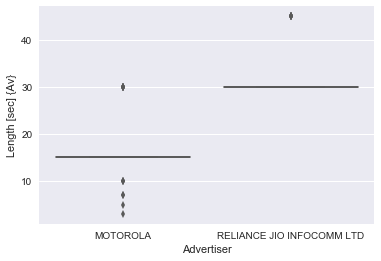

In [26]:
sns.boxplot(x = "Advertiser", y = "Length [sec] {Av}", data = ipl_mot_rel, palette = "Set2", )

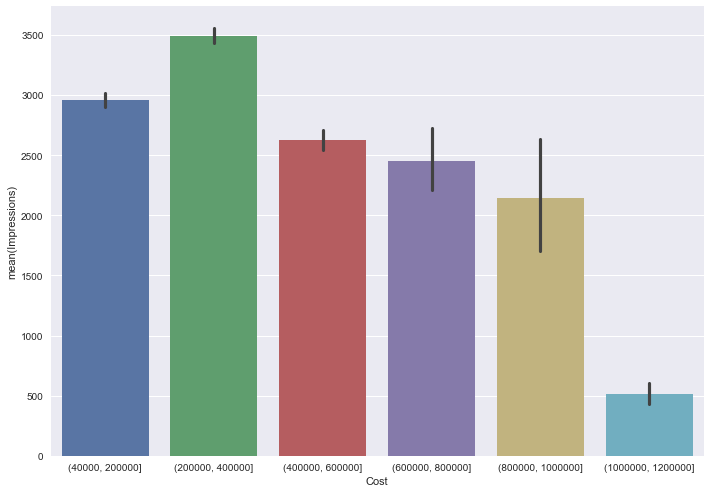

In [80]:
#Is Cost related to impressions?
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
out = pd.cut(ipl_data["Cost"], bins = [40000, 200000, 400000, 600000, 800000, 1000000, 1200000])
sns.barplot(x = out, y = "Impressions", data = ipl_data, ax = ax)

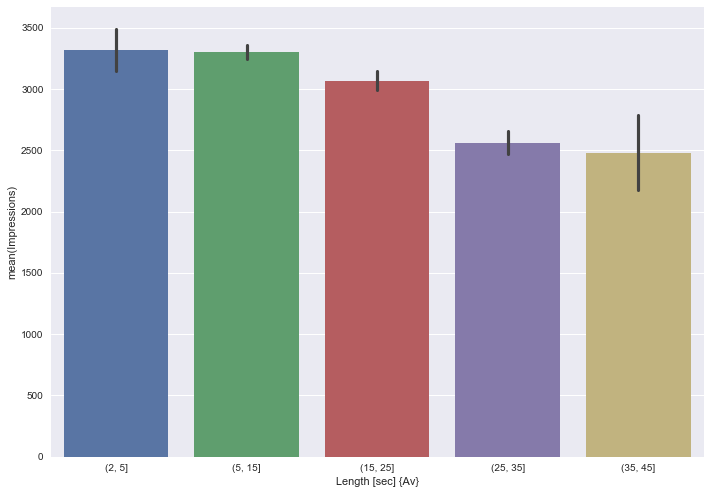

In [29]:
#Is length related to impressions?
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
out = pd.cut(ipl_data["Length [sec] {Av}"], bins = [2, 5, 15, 25, 35, 45])
sns.barplot(x = out, y = "Impressions", data = ipl_data)

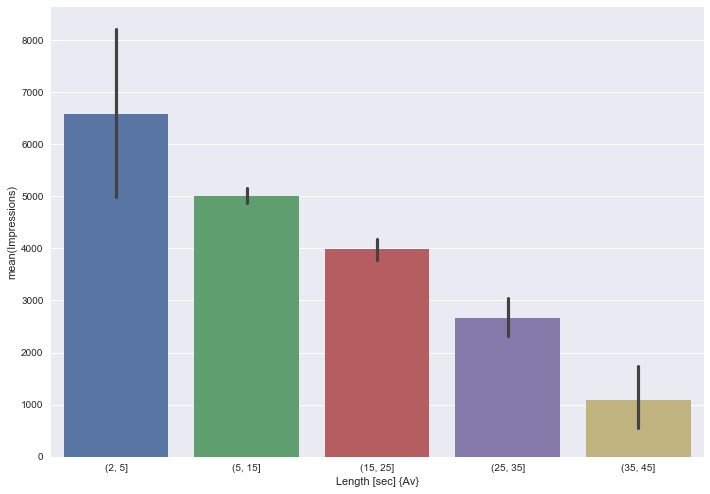

In [30]:
#Is length related to impressions?
ipl_tel = ipl_data[(ipl_data['Sector'] == 'Telecom Products')]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
out = pd.cut(ipl_tel["Length [sec] {Av}"], bins = [2, 5, 15, 25, 35, 45])
sns.barplot(x = out, y = "Impressions", data = ipl_tel)

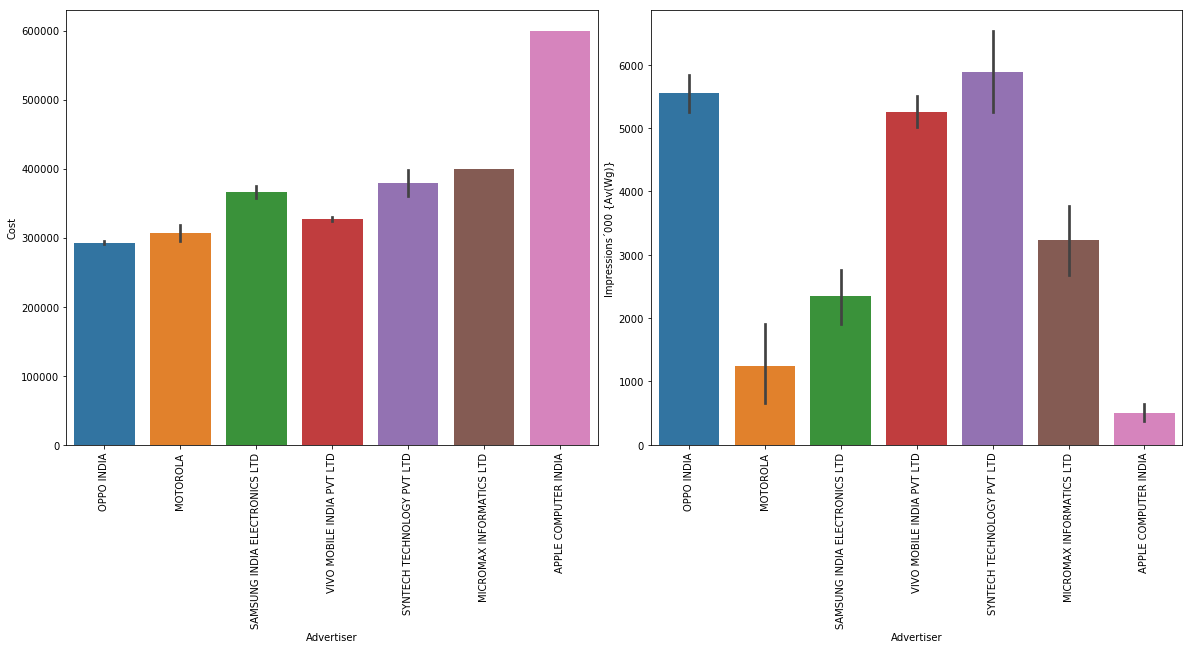

In [114]:
# impression and cost for the 4th month
ipl_m4 = ipl_tel[(ipl_tel['Month'] == 4)]
plt.figure(figsize = (20,8))
plt.subplots_adjust(wspace = 0.1)
plt.subplot(1,2,1)
sns.barplot(x = "Advertiser", y = "Cost", data = ipl_m4)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x = "Advertiser", y = "Impressions´000 {Av(Wg)}", data = ipl_m4)
plt.xticks(rotation = 90)
plt.show()

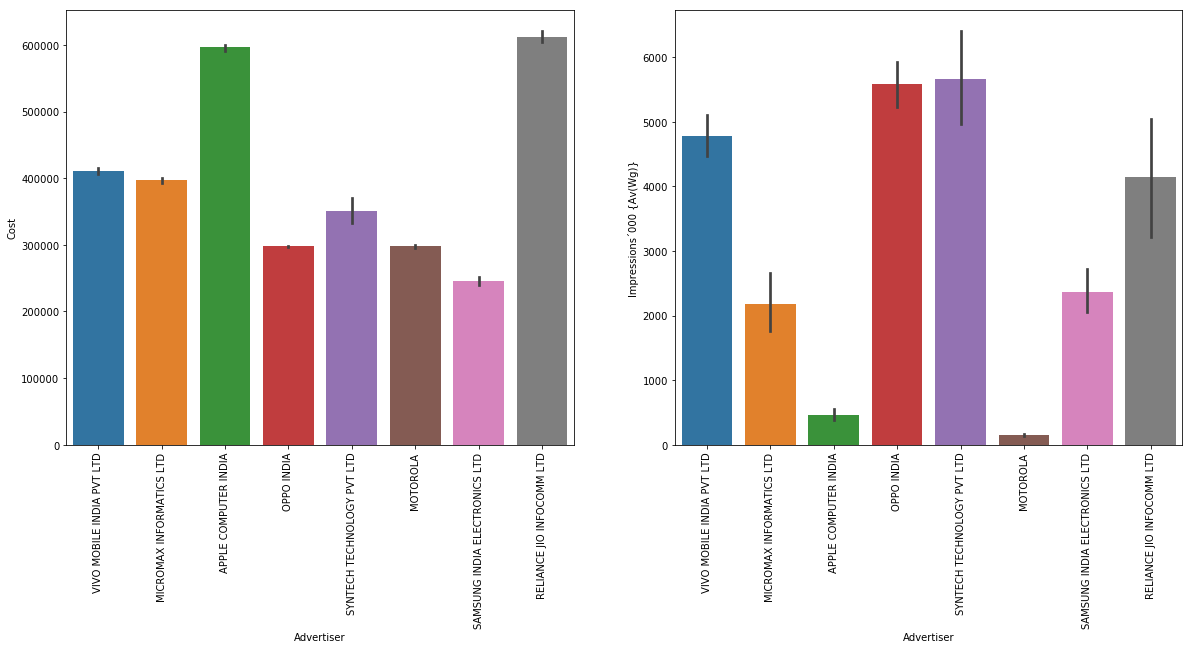

In [118]:
# impression and cost for the 5th month
ipl_m4 = ipl_tel[(ipl_tel['Month'] == 5)]
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(x = "Advertiser", y = "Cost", data = ipl_m4)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x = "Advertiser", y = "Impressions´000 {Av(Wg)}", data = ipl_m4)
plt.xticks(rotation = 90)
plt.show()
# Reliance came in the 5th month

In [82]:
def tel_ad(adv):    
    ipl_tel_ad = ipl_tel[ipl_tel['Advertiser'] == adv]
    return ipl_tel_ad['Description'].value_counts()
print(tel_ad("MOTOROLA"))
print(tel_ad("RELIANCE JIO INFOCOMM LTD"))
print(tel_ad("APPLE COMPUTER INDIA"))
print(tel_ad("SYNTECH TECHNOLOGY PVT LTD"))
print(tel_ad("MICROMAX INFORMATICS LTD"))
print(tel_ad("SAMSUNG INDIA ELECTRONICS LTD"))
print(tel_ad("OPPO INDIA"))
print(tel_ad("VIVO MOBILE INDIA PVT LTD"))

MOTOROLA MOTO G FAMILY    209
Name: Description, dtype: int64
JIO FI    153
Name: Description, dtype: int64
APPLE IPHONE 7         163
APPLE IPHONE 7 PLUS    118
Name: Description, dtype: int64
GIONEE A1    575
Name: Description, dtype: int64
MICROMAX DUAL 5    558
Name: Description, dtype: int64
SAMSUNG GALAXY S8/S8 PLUS    659
SAMSUNG PAY                  382
Name: Description, dtype: int64
OPPO F3 PLUS       1843
OPPO F3/F3 PLUS     826
Name: Description, dtype: int64
VIVO V5              1915
VIVO V5 S/V5 PLUS    1494
VIVO CAM               48
VIVO SMART PHONES      20
VIVO V5 PLUS            4
Name: Description, dtype: int64


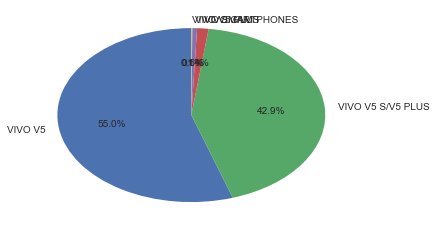

In [85]:
labels = ['VIVO V5', 'VIVO V5 S/V5 PLUS', 'VIVO CAM', 'VIVO SMARTPHONES', 'VIVO V5 PLUS']
plt.pie(tel_ad("VIVO MOBILE INDIA PVT LTD"), labels = labels, autopct = "%1.1f%%", startangle=90)
plt.show()

In [34]:
sectorwise_data=ipl_data.groupby('Sector').Impressions.mean()
sectorwise_data

Sector
Alcoholic Drinks                                    1326.013103
Auto                                                4237.403729
Banking/Finance/Investment                          2729.126342
Building, Industrial & Land Materials/Equipments    4103.338717
Corporate/Brand Image                               1273.590445
Cosmetics                                            472.266000
Durables                                            2627.378888
Education                                            412.583067
Food & Beverages                                    3368.243713
Fuel/Petroleum Products                             2541.463430
Hair Care                                            728.616023
Laundry                                             1000.428687
Miscellaneous                                        531.768469
Personal Accessories                                5799.495676
Personal Care/Personal Hygiene                      1292.736245
Personal Healthcare              

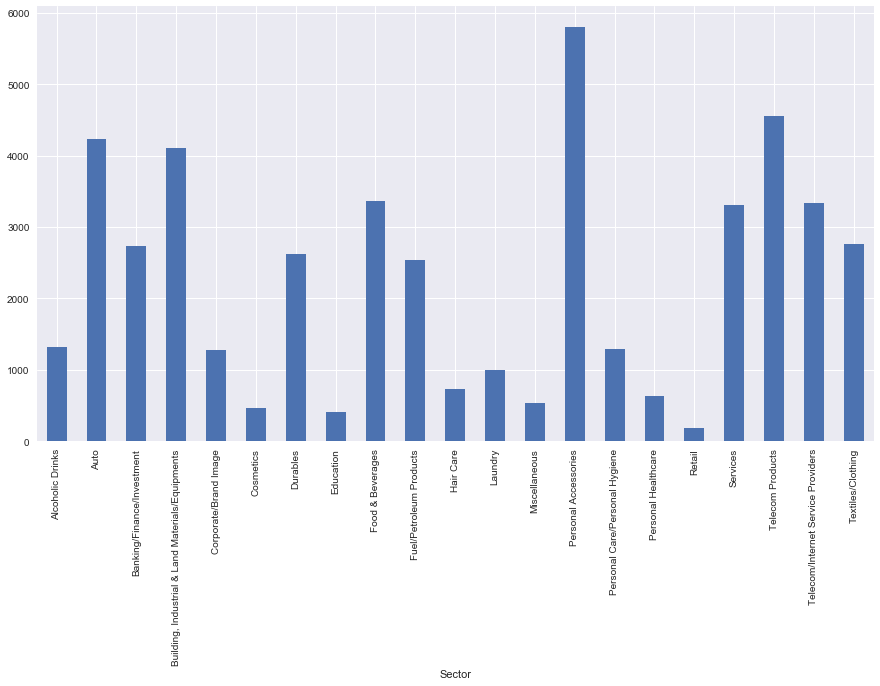

In [54]:
plt.figure(figsize = (15,8))
sectorwise_data.plot(kind = "bar")

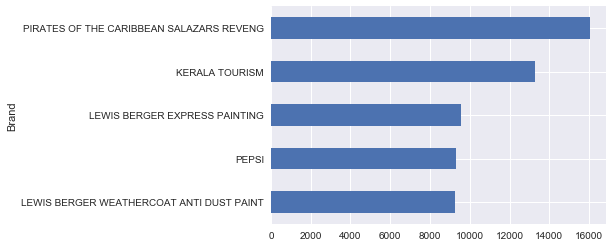

In [72]:
brandwise_data=ipl_data.groupby('Brand').Impressions.mean()
brandwise_data.sort_values(ascending=False).head().sort_values().plot(kind = "barh")

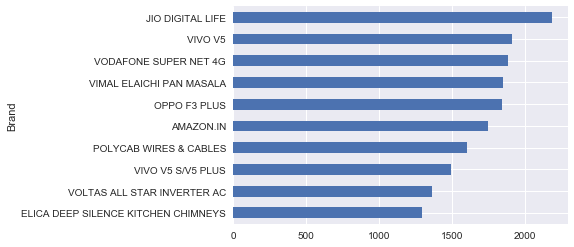

In [77]:
ipl_data.groupby('Brand').Advertiser.count().sort_values(ascending = False).head(10).sort_values().plot(kind = "barh")

In [86]:
ipl_data["Cost"].min()

40000

In [91]:
ipl_data['Start Time {Av(Tm)}']=pd.to_datetime(ipl_data['Start Time {Av(Tm)}'])
ipl_data['hour']=ipl_data['Start Time {Av(Tm)}'].dt.hour
hourwise_data=ipl_data.groupby('hour').Impressions.mean()

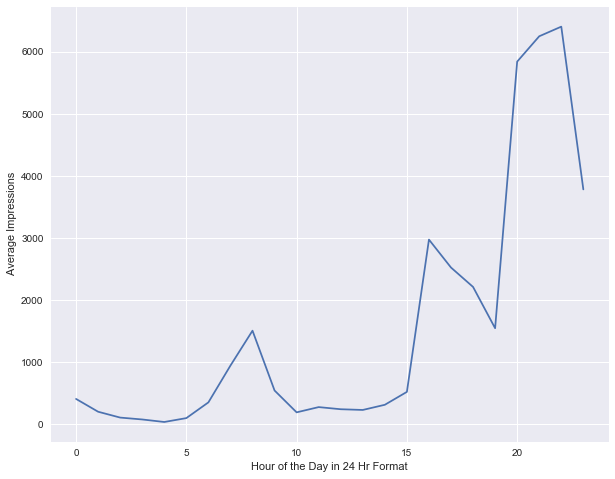

In [94]:
plt.figure(figsize = (10,8))
plt.plot(hourwise_data)
plt.ylabel(' Average Impressions')
plt.xlabel('Hour of the Day in 24 Hr Format')